<a href="https://colab.research.google.com/github/aymanred121/handwritten-signature-recognition/blob/main/model/handwrittenClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import datasets, layers, models
import cv2

In [45]:
!rm -rf /content/*

In [46]:
!gdown 1WqIhqp9JJ65SZPs9v868P_-SBCVTR2By

Downloading...
From: https://drive.google.com/uc?id=1WqIhqp9JJ65SZPs9v868P_-SBCVTR2By
To: /content/CV_2023_SC_Dataset.zip
100% 1.20M/1.20M [00:00<00:00, 158MB/s]


In [47]:
!unzip /content/CV_2023_SC_Dataset.zip -d /content/data

Archive:  /content/CV_2023_SC_Dataset.zip
   creating: /content/data/personA/Test/
  inflating: /content/data/personA/Test/personA_10.png  
  inflating: /content/data/personA/Test/personA_13.png  
  inflating: /content/data/personA/Test/personA_2.png  
  inflating: /content/data/personA/Test/personA_20.png  
  inflating: /content/data/personA/Test/personA_27.png  
  inflating: /content/data/personA/Test/personA_29.png  
  inflating: /content/data/personA/Test/personA_30.png  
  inflating: /content/data/personA/Test/personA_42.png  
  inflating: /content/data/personA/Test/personA_SigVerificationTestLabels.csv  
   creating: /content/data/personA/Train/
  inflating: /content/data/personA/Train/personA_1.png  
  inflating: /content/data/personA/Train/personA_11.png  
  inflating: /content/data/personA/Train/personA_12.png  
  inflating: /content/data/personA/Train/personA_14.png  
  inflating: /content/data/personA/Train/personA_15.png  
  inflating: /content/data/personA/Train/personA_16

In [48]:
import os
persons = ['A','B','C','D','E']
os.mkdir('/content/Train')
os.mkdir('/content/Test')
for p in persons:
    os.mkdir('/content/Train/person'+p)
    os.mkdir('/content/Test/person'+p)
    

In [49]:
import shutil
import os
import glob
for p in os.listdir('data'):
  print(p)
  for f in os.listdir(f'data/{p}'):
    for d in glob.glob(f'/content/data/{p}/{f}/*'):
      shutil.move(d,f'/content/{f}/{p}')

personB
personA
personC
personE
personD


In [50]:
persons = ['A','B','C','D','E']
df = pd.DataFrame()
for person in  persons:
  path = f'/content/Train/person{person}/person{person}_SigVerificationTrainLabels.csv'
  tempdf = pd.read_csv(path)
  tempdf['person'] = person
  df = df.append(tempdf)

In [51]:
df = df.sample(frac=1).reset_index(drop=True)


In [52]:
person = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4
}
df['person'] = df['person'].map(person)

In [53]:
labels = {
    'real':0,
    'forged':1
}
df['label'] = df['label'].map(labels)

In [54]:
df['person'].value_counts()

2    40
1    40
4    40
3    40
0    40
Name: person, dtype: int64

In [55]:
dad=cv2.imread('/content/Test/personA/personA_10.png')

In [56]:
dad.shape

(318, 343, 3)

In [57]:
model = models.Sequential([
    layers.Conv2D(96, (11, 11), activation='relu', input_shape=(215, 90, 1),strides=4),
    layers.MaxPooling2D((3,3),strides=(4,4),padding='same'),
    layers.Conv2D(256, (5, 5), activation='relu',padding='same'),
    layers.MaxPooling2D((3,3),padding='same'),
    layers.Conv2D(384, (3, 3), activation='relu',strides=1,padding='same'),

    layers.Conv2D(384, (3, 3), activation='relu',strides=1,padding='same'),

    layers.Conv2D(256, (3, 3), activation='relu',strides=1,padding='same'),
    layers.MaxPooling2D((3,3),strides=2,padding='same'),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',

              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 52, 20, 96)        11712     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 5, 96)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 5, 256)        614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 2, 256)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 2, 384)         885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 2, 384)        

In [59]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "Train/",
    labels="inferred",
    label_mode="int",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
    color_mode="grayscale",
    batch_size=32,
    image_size=(215, 90),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="training",
)

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "Train/",
    labels="inferred",
    label_mode="int",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
    color_mode="grayscale",
    batch_size=32,
    image_size=(215, 90),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="validation",
)
ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    "Test/",
    labels="inferred",
    label_mode="int",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
     color_mode="grayscale",
    batch_size=32,
    image_size=(215, 90),  # reshape if not in this size
    shuffle=True,
    seed=123,
    )

Found 200 files belonging to 5 classes.
Using 180 files for training.
Found 200 files belonging to 5 classes.
Using 20 files for validation.
Found 40 files belonging to 5 classes.


In [ ]:
history = model.fit(ds_train,epochs=50,validation_data=ds_validation)

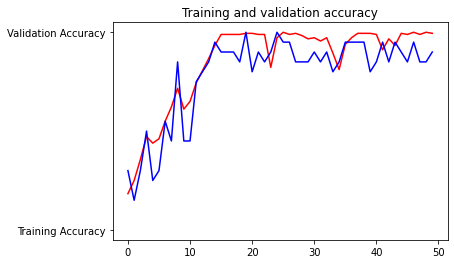

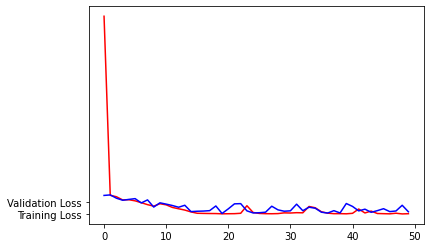

In [61]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")



In [62]:
model.evaluate(ds_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0271 - acc: 1.0000


[0.02708061970770359, 1.0]